In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [6]:

####################################################################################################
####################################################################################################

file_xy  = "./predictions/z_DeltaT.pkl"
df_xy    = pd.read_pickle(file_xy)

display(df_xy[0:5][:])
print()


####################################################################################################
####################################################################################################

arr_z_true = df_xy[:]['depth'].as_matrix()
arr_z_pred = df_xy[:]['z_pred'].as_matrix()
arr_z_intr = df_xy[:]['intr_z'].as_matrix()*-1

arr_dz_true_pred = arr_z_true - arr_z_pred
arr_dz_true_intr = arr_z_true - arr_z_intr



,event_number,depth,intr_depth,intr_z,z_pred
100000,156467,89.428794,89.66448,-89.41968,89.281265
100001,156468,77.495845,77.97456,-77.72976,77.599518
100002,156469,63.686664,63.97920,-63.73440,63.613926
100003,156470,79.201652,79.48512,-79.24032,79.109024
100004,156474,87.226589,87.67728,-87.43248,87.295448


/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/project/lgrandi/dbarge/anaconda3/envs/ml_py365/lib/python3.6/site-packages/ipykernel/__main__.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [11]:

####################################################################################################
####################################################################################################

z_min     = -45
z_max     =  45
z_nbins   = 90

dz_nbins = 12*10
dz_range = [-6, 6]
dz_max   = 2

eps   = .001

z_mean_true  = np.mean(arr_z_true)
z_mean_pred  = np.mean(arr_z_pred)
z_mean_intr  = np.mean(arr_z_intr)

z_std_true   = np.std(arr_z_true)
z_std_pred   = np.std(arr_z_pred)
z_std_intr   = np.std(arr_z_intr)

dz_mean_true_pred = np.mean(arr_dz_true_pred)
dz_mean_true_intr = np.mean(arr_dz_true_intr)

dz_std_true_pred = np.std (arr_dz_true_pred)
dz_std_true_intr = np.std (arr_dz_true_intr)


label_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', z_std_true, z_mean_true )
label_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', z_std_pred, z_mean_pred )
label_intr = '%5s (std: %.02f, mean: %.02f)' % ( 'Reco', z_std_intr, z_mean_intr )

dz_label_true_pred = '%5s (std: %.03f, mean: %.02f)' % ( 'dZ(true, pred)', dz_std_true_pred, dz_mean_true_pred )
dz_label_true_intr = '%5s (std: %.03f, mean: %.02f)' % ( 'dZ(true, reco)', dz_std_true_intr, dz_mean_true_intr )


####################################################################################################
# Overflow & Underflow
####################################################################################################

arr_dz_true_pred = np.clip(arr_dz_true_pred, -dz_max, dz_max)
arr_dz_true_intr = np.clip(arr_dz_true_intr, -dz_max, dz_max)



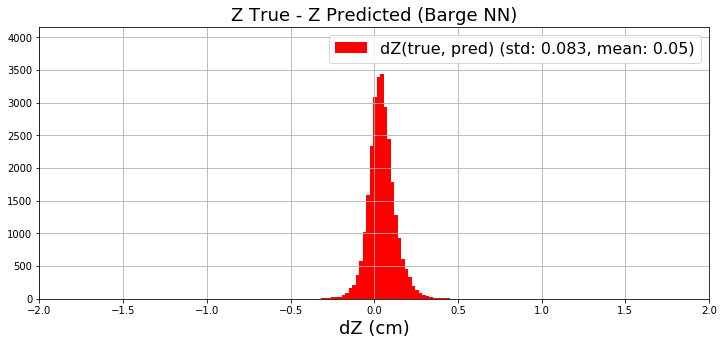

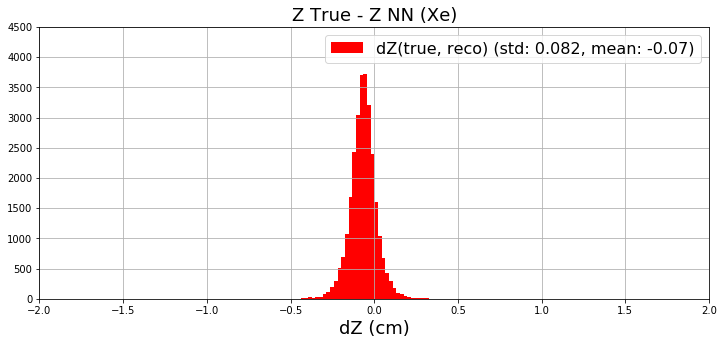

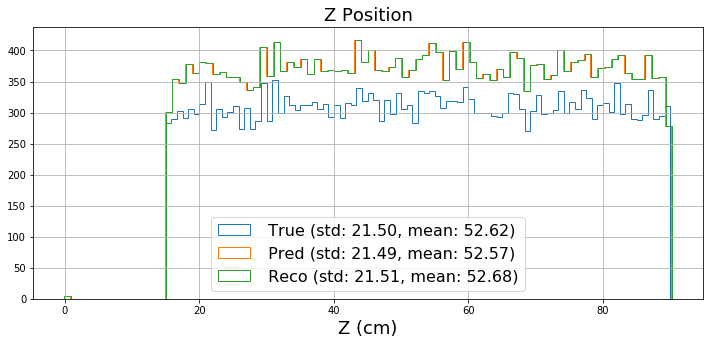

In [12]:


w, h = 12, 5

####################################################################################################
# Z Resolution - Prediction
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dz_true_pred, bins=dz_nbins, histtype='bar', color='r', label=dz_label_true_pred)
plt.xlim([-dz_max, dz_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('Z True - Z Predicted (Barge NN)', fontsize=18)
plt.xlabel('dZ (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/z_z-resolution_barge.png')


####################################################################################################
# Z Resolution - Reco
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dz_true_intr, bins=dz_nbins, histtype='bar', color='r', label=dz_label_true_intr)
plt.xlim([-dz_max, dz_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('Z True - Z NN (Xe)', fontsize=18)
plt.xlabel('dZ (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/z_z-resolution_reco-Xe1T.png')


####################################################################################################
# Z Position
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_z_true, bins=z_nbins, fill=False, histtype='step', label=label_true)
plt.hist(arr_z_pred, bins=z_nbins, fill=False, histtype='step', label=label_pred)
plt.hist(arr_z_intr, bins=z_nbins, fill=False, histtype='step', label=label_intr)

plt.xlabel('Z (cm)', fontsize=18)
plt.title('Z Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)

plt.savefig('plots/z_z.png')

